In [12]:
import pandas as pd
import numpy as np
import keras
import tensorflow

In [13]:
from keras.models import Sequential
from keras.layers import Dense

In [14]:
from sklearn.model_selection import train_test_split


In [15]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

In [20]:
data= pd.read_csv('gas_turbines.csv')
data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [21]:
data1=data

In [22]:
from sklearn.preprocessing import LabelEncoder
data1=data1.apply(LabelEncoder().fit_transform)
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,1230,292,12092,2208,787,292,2285,707,461,10695,10885
1,1199,297,12149,2207,842,293,2285,709,454,10775,10892
2,1251,301,11882,2148,883,294,2272,708,457,10746,10835
3,1334,305,11699,2138,892,296,2284,709,462,10738,10875
4,1505,310,11676,2197,871,297,2283,709,468,10782,10774
...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,491,256,11809,10229
15035,1732,272,12467,2230,577,163,1742,508,289,12015,10317
15036,1433,276,12533,2121,675,83,1247,352,339,12818,11571
15037,1302,281,12449,2009,545,135,1583,406,389,12579,11636


In [23]:
data1['TEY'].describe()

count    15039.00000
mean      1818.09994
std        999.24952
min          0.00000
25%       1344.50000
50%       1739.00000
75%       2191.50000
max       4206.00000
Name: TEY, dtype: float64

In [25]:
data1['Tey_New']=pd.cut(data1.TEY,bins=[0,1739,4206],labels=[0,1])
data2=data1.drop(['TEY'],axis=1)
data2

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX,TEY_New,Tey_New
0,1230,292,12092,2208,787,292,2285,461,10695,10885,0,0
1,1199,297,12149,2207,842,293,2285,454,10775,10892,0,0
2,1251,301,11882,2148,883,294,2272,457,10746,10835,0,0
3,1334,305,11699,2138,892,296,2284,462,10738,10875,0,0
4,1505,310,11676,2197,871,297,2283,468,10782,10774,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15034,2278,269,12369,2376,382,197,1964,256,11809,10229,0,0
15035,1732,272,12467,2230,577,163,1742,289,12015,10317,0,0
15036,1433,276,12533,2121,675,83,1247,339,12818,11571,0,0
15037,1302,281,12449,2009,545,135,1583,389,12579,11636,0,0


In [27]:
df= data2.values
df

array([[ 1230,   292, 12092, ..., 10885,     0,     0],
       [ 1199,   297, 12149, ..., 10892,     0,     0],
       [ 1251,   301, 11882, ..., 10835,     0,     0],
       ...,
       [ 1433,   276, 12533, ..., 11571,     0,     0],
       [ 1302,   281, 12449, ..., 11636,     0,     0],
       [ 1266,   285, 12227, ..., 11620,     0,     0]], dtype=int64)

In [29]:
x = df[:,0:10]
y = df[:,10]

In [30]:
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size=0.33)


In [31]:
model = Sequential()
model.add(Dense(32, input_dim=10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(10, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='random_uniform', activation='sigmoid'))

In [32]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc']) 

In [34]:
# Fit the model
hist = model.fit(x, y,validation_split=0.33,epochs=150, batch_size=10) 

Epoch 1/150
1008/1008 [==============================] - 3s 2ms/step - loss: 0.3619 - acc: 0.8018 - val_loss: -9124205975044096.0000 - val_acc: 0.8086
Epoch 2/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3270 - acc: 0.8211 - val_loss: -11901684015955968.0000 - val_acc: 0.8579
Epoch 3/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.3051 - acc: 0.8393 - val_loss: -15480269020594176.0000 - val_acc: 0.8501
Epoch 4/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2966 - acc: 0.8442 - val_loss: -13329497575129088.0000 - val_acc: 0.8062
Epoch 5/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2908 - acc: 0.8486 - val_loss: -13021081342312448.0000 - val_acc: 0.8604
Epoch 6/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2915 - acc: 0.8490 - val_loss: -12329517519470592.0000 - val_acc: 0.8600
Epoch 7/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2931 - acc

Epoch 55/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2416 - acc: 0.8837 - val_loss: -47428486331105280.0000 - val_acc: 0.8819
Epoch 56/150
1008/1008 [==============================] - 3s 3ms/step - loss: 0.2399 - acc: 0.8858 - val_loss: -18480937184526336.0000 - val_acc: 0.8892
Epoch 57/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2397 - acc: 0.8835 - val_loss: -42364771428728832.0000 - val_acc: 0.8868
Epoch 58/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2397 - acc: 0.8859 - val_loss: -46917153294647296.0000 - val_acc: 0.8904
Epoch 59/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2395 - acc: 0.8857 - val_loss: -45442068251672576.0000 - val_acc: 0.8839
Epoch 60/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2397 - acc: 0.8870 - val_loss: -42182072109891584.0000 - val_acc: 0.8847
Epoch 61/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.24

1008/1008 [==============================] - 2s 2ms/step - loss: 0.2404 - acc: 0.8834 - val_loss: -36277982431543296.0000 - val_acc: 0.8878
Epoch 109/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2344 - acc: 0.8863 - val_loss: -66950336757104640.0000 - val_acc: 0.8807
Epoch 110/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2356 - acc: 0.8855 - val_loss: -71627959869374464.0000 - val_acc: 0.8900
Epoch 111/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2345 - acc: 0.8909 - val_loss: -72179004173451264.0000 - val_acc: 0.8912
Epoch 112/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2364 - acc: 0.8860 - val_loss: -91970746049363968.0000 - val_acc: 0.8902
Epoch 113/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2356 - acc: 0.8878 - val_loss: -77573311298535424.0000 - val_acc: 0.8908
Epoch 114/150
1008/1008 [==============================] - 2s 2ms/step - loss: 0.2355 - ac

In [36]:
scores = model.evaluate(x, y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

470/470 [==============================] - 0s 1ms/step - loss: -42350829964886016.0000 - acc: 0.8821
acc: 88.21%


In [37]:
hist.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

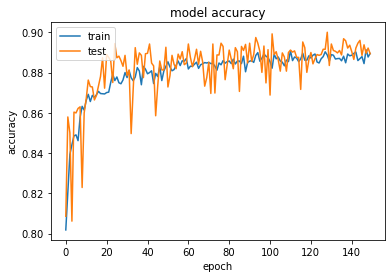

In [38]:
import matplotlib.pyplot as plt
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

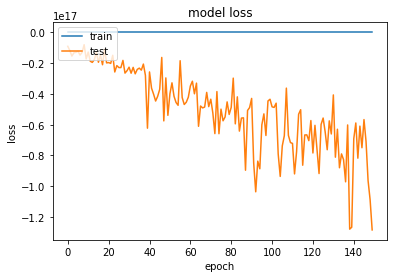

In [39]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss') 
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()